In [203]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes import jtplot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.api import add_constant

os.chdir(r'/Users/anceaumathilde/data-ft-par-labs/Statistically_Significant_Insights/cleaned_data')
df=pd.read_csv('final_df_temp_CO2C.csv')

In [204]:
df.head()

,Year,VarTemp,CO2_mmp
0,1958,0.12,315.296000
1,1959,0.08,315.976667
2,1960,0.05,316.907500
3,1961,0.10,317.640000
4,1962,0.11,318.448333


<ipython-input-441-764ea47aa9d9>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



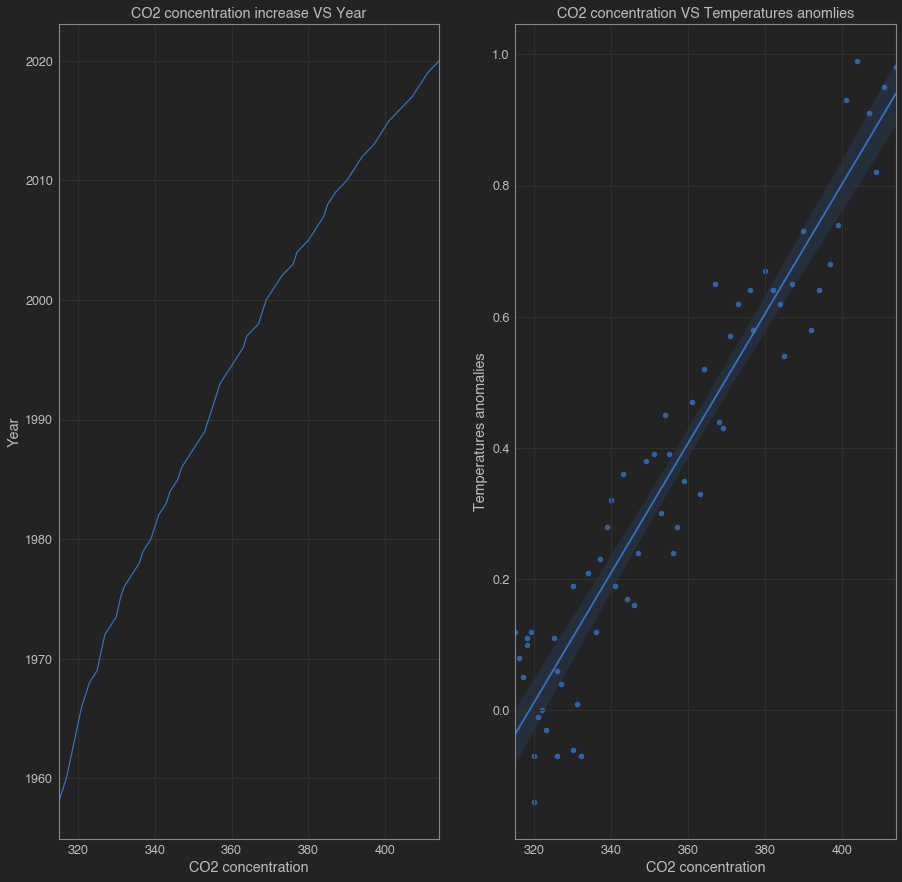

In [441]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,15))
# ax1.plot(df.x, df.y)
ax1.set_title('CO2 concentration increase VS Year')
ax2.set_title('CO2 concentration VS Temperatures anomlies')
# ax2.scatter(df.x, df.y)
sns.lineplot(data=df,x=df.CO2_mmp,y=df.Year, ax=ax1)
sns.regplot(data=df,x=df.CO2_mmp,y=df.VarTemp,ax=ax2)
ax1.set_xlabel("CO2 concentration")
ax2.set_xlabel("CO2 concentration")
ax2.set_ylabel("Temperatures anomalies")
fig.show()


In [206]:
#there seems to be a strong correlation be but we need to be careful because the shadow is also present whcih there might be some errors. It is maybe bacause we don't have so much data. Anyway there is a trend between CO2 concentration & temeratures variations.

In [400]:
model_fit = ols('CO2_mmp ~ VarTemp', data=df).fit()

In [401]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CO2_mmp   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     602.4
Date:                Thu, 20 May 2021   Prob (F-statistic):           2.61e-33
Time:                        16:39:17   Log-Likelihood:                -226.48
No. Observations:                  63   AIC:                             457.0
Df Residuals:                      61   BIC:                             461.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.0802      1.771    181.862      0.000     318.539     325.622
VarTemp       92.1007      3.753     24.544      0.000      84.597      99.604
==============================================================================
Omnibus:                        6.780   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                2.533
Skew:                          -0.044   Prob(JB):                        0.282
Kurtosis:                       2.022   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

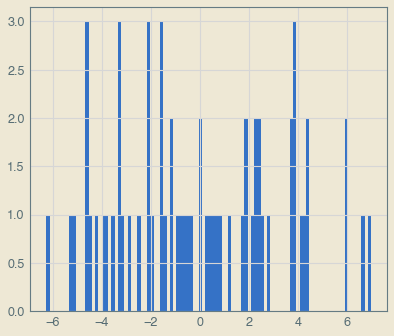

In [209]:
model_fit.resid.hist(bins=100)

In [210]:
y_pred = model_fit.predict()
resids = model_fit.resid

In [211]:
y_pred

array([311.38426896, 311.82502781, 312.47126297, 314.76130858,
       316.22944897, 317.69758936, 313.61786947, 316.31886769,
       318.81438961, 320.28253   , 320.92876516, 325.06809753,
       325.30338008, 323.89485217, 327.41775563, 331.76256431,
       327.88832072, 330.58931895, 330.20817258, 337.22417324,
       336.63755056, 340.16045401, 342.45049963, 344.53506893,
       343.12654103, 347.88230232, 345.24091658, 346.29810435,
       349.20457888, 353.34391126, 354.81205164, 354.22542896,
       358.57023764, 358.60004388, 356.78056337, 358.86513267,
       361.5661309 , 365.29451066, 363.68050645, 368.84722035,
       372.78107642, 369.72873806, 370.78592583, 374.92525821,
       377.21530382, 378.88892051, 378.91872675, 382.03067759,
       382.67691275, 383.52862422, 383.14747785, 386.6703813 ,
       389.57685583, 387.75737532, 390.25289724, 392.33746654,
       394.83298846, 399.99970237, 402.49522429, 402.11407792,
       401.52745524, 405.4613113 , 407.3404043 ])

In [212]:
x_fut=np.linspace(-0.1, 2, 10)

In [213]:
predic=[x for x in x_fut]

In [214]:
CO2_mmp=list(map ((lambda x: round(91.8913 * x +322.1056)),predic))

In [215]:
d = {'CO2_mmp':CO2_mmp,'VarTemp':predic}
df2=pd.DataFrame(d)
max_graph=df2.CO2_mmp.max()
df2

,CO2_mmp,VarTemp
0,313,-0.100000
1,334,0.133333
2,356,0.366667
3,377,0.600000
4,399,0.833333
5,420,1.066667
6,442,1.300000
7,463,1.533333
8,484,1.766667
9,506,2.000000


<ipython-input-440-426dee2dca58>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



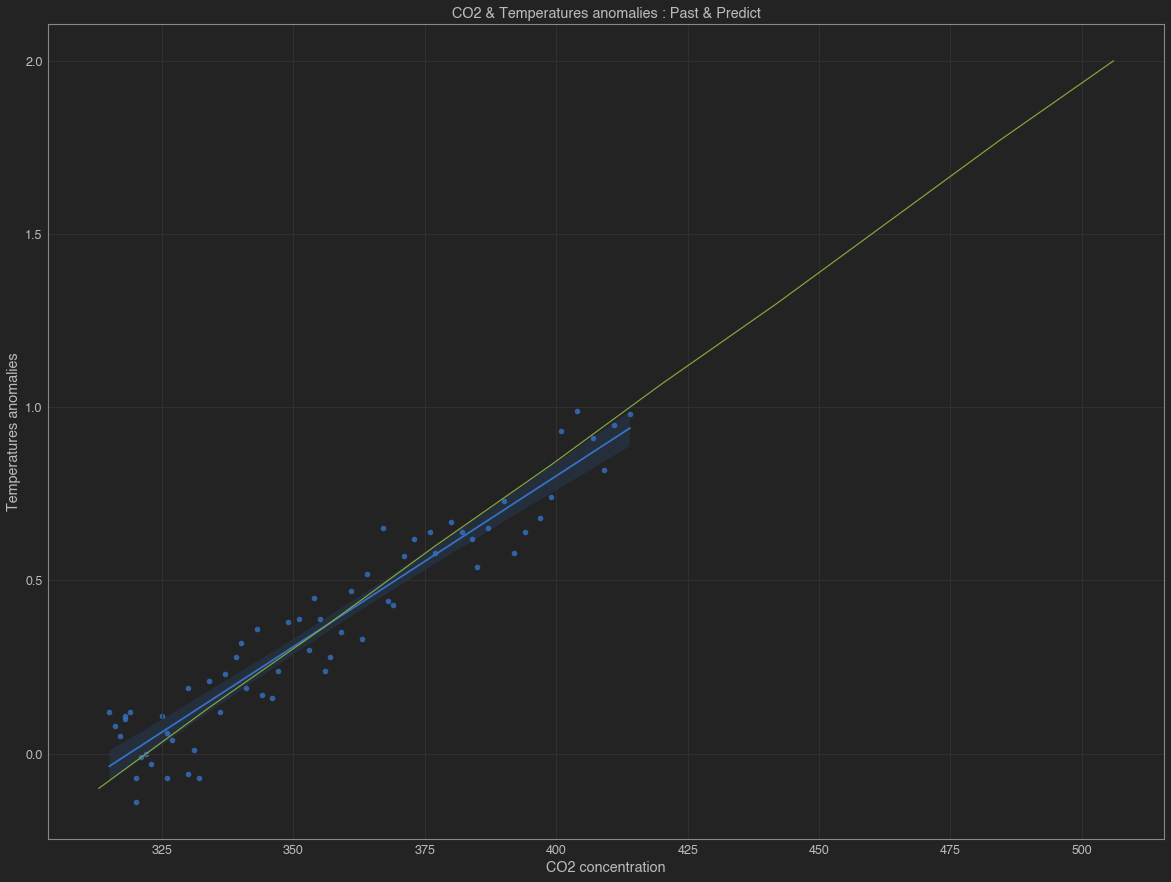

In [440]:
jtplot.style(theme='monokai')
fig=plt.figure(figsize=(20,15))
sns.regplot(data=df,y=df.VarTemp,x=df.CO2_mmp)
sns.lineplot(data=df2,y=df2.VarTemp,x=df2.CO2_mmp)
plt.xlabel("CO2 concentration")
plt.ylabel("Temperatures anomalies")
plt.title('CO2 & Temperatures anomalies : Past & Predict')
fig.show()

In [221]:
d = {'CO2_mmp':CO2_mmp,'Year':x_fut_2}
df3=pd.DataFrame(d)
df3

,CO2_mmp,Year
0,307,1958
1,308,1959
2,310,1960
3,311,1961
4,313,1962
...,...,...
1038,1947,2996
1039,1948,2997
1040,1950,2998
1041,1951,2999


In [412]:
def slope(y1,y2): 
    x1=float(df.loc[df['Year']==y1].CO2_mmp.values)
    x2=float(df.loc[df['Year']==y2].CO2_mmp.values)
    slope=round((y2 - y1) / (x2 - x1),2)
    return slope


In [478]:
def VarAnom (year):
    b=round(2018-409*s)
    co2=round((year-b)/s)
    var=round((co2-322.1056)/91.8913,2)
    return var

In [469]:
s=slope(2010,2020)
VarAnom(2058)

By year 2058, if our CO2 concentration continue to grow as fast as between 2010 and 2020, the concentration of CO2 will be 505 mmp and the worlwide temperature anomaly will be + 1.99 °C


In [339]:
start_temp=float(df.loc[df['Year']==1958].VarTemp.values)
final_temp=float(df.loc[df['Year']==2020].VarTemp.values)
start_CO2=float(df.loc[df['Year']==1958].CO2_mmp.values)
final_CO2=float(df.loc[df['Year']==2020].CO2_mmp.values)

In [349]:
temp_growth = (final_temp/start_temp)**(1/(2020-1958))-1
print ('Growth rate of temperature is {:.2%} '.format(temp_growth))

Growth rate of temperature is 3.45% 


In [347]:
co2_growth = (final_CO2/start_CO2)**(1/(2020-1958))-1
print ('Growth rate of temperature is {:.2%} '.format(co2_growth))

Growth rate of temperature is 0.44% 


In [357]:
ratio = round(temp_growth/co2_growth)
print ('In average, when CO2 concentration rises of 1 point, temperature anomalies rises by {} points '.format(ratio))

In average, when CO2 concentration rises of 1 point, temperature anomalies rises by 8 points 


In [514]:
frames=[]
yr=[]
for year in range (2020,2062,8):
    x=VarAnom(year)
    frames.append(x)
    yr.append(year)
frames


[1.0, 1.21, 1.41, 1.62, 1.83, 2.04]

ModuleNotFoundError: No module named 'cairosvg'

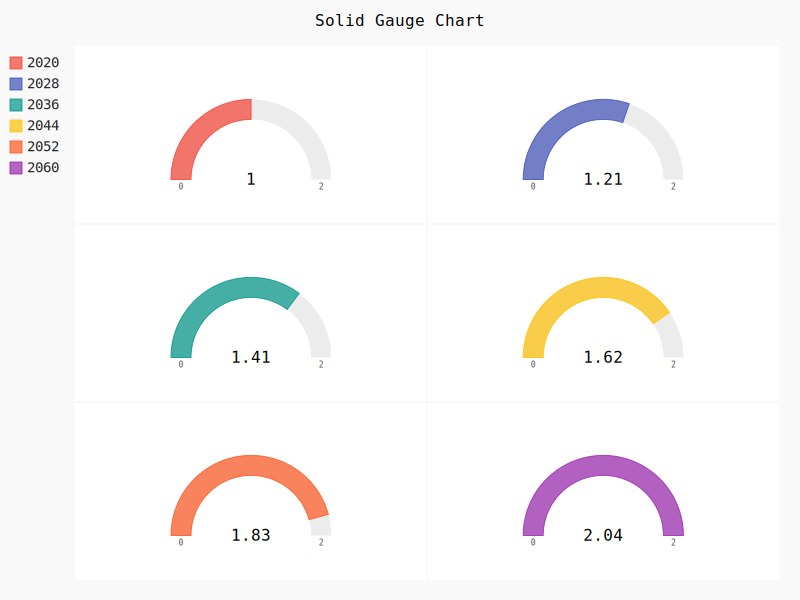

In [529]:
import pygal

# creating the chart object
Solid_Gauge = pygal.SolidGauge(inner_radius = 0.75, 
                               half_pie = True)
  
# naming the title
Solid_Gauge.title = 'Solid Gauge Chart'     
Solid_Gauge.add(str(yr[0]), [{'value': frames[0], 'max_value': 2}]) 
Solid_Gauge.add(str(yr[1]), [{'value': frames[1], 'max_value': 2}]) 
Solid_Gauge.add(str(yr[2]), [{'value': frames[2], 'max_value': 2}]) 
Solid_Gauge.add(str(yr[3]), [{'value': frames[3], 'max_value': 2}]) 
Solid_Gauge.add(str(yr[4]), [{'value': frames[4], 'max_value': 2}]) 
Solid_Gauge.add(str(yr[5]), [{'value': frames[5], 'max_value': 2}]) 

Solid_Gauge